### Moving Average Plots

This notebook demonstrates how to plot the data using moving averages to create smooth curves of the average intensity throughout the intestine. More documentation to come.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_pickle("/Volumes/onishlab_shared/PROJECTS/30_Andrew/03_IMAGING_DATABASE/IMDB.pkl")
data = df.loc[:, ["diet", "REP", "array_vals"]].values

In [101]:
data_age = df.loc[:, ["diet", "stage", "array_vals"]].values

In [102]:
J_age = data_age[data_age[:, 0] == "JUB66_RFP"]
CB_age = data_age[data_age[:, 0] == "JUB66_RFP_IN_CEMBIO"]
NC_age = data_age[data_age[:, 0] == "MK_JUB66_RFP_IN_JUB66"]

In [3]:
J = data[data[:, 0] == "JUB66_RFP"]
CB = data[data[:, 0] == "JUB66_RFP_IN_CEMBIO"]
NC = data[data[:, 0] == "MK_JUB66_RFP_IN_JUB66"]

In [4]:
J_reps = [J[J[:, 1] == 1][:, 2], J[J[:, 1] == 2][:, 2], J[J[:, 1] == 3][:, 2]]

In [7]:
CB_reps = [CB[CB[:, 1] == 1][:, 2],
CB[CB[:, 1] == 2][:, 2],
CB[CB[:, 1] == 3][:, 2]]

In [8]:
NC_reps = [NC[NC[:, 1] == 1][:, 2],
NC[NC[:, 1] == 2][:, 2],
NC[NC[:, 1] == 3][:, 2]]

In [9]:
J = np.stack(J)
CB = np.stack(CB)
NC = np.stack(NC)

In [10]:
J.shape, CB.shape, NC.shape

((30, 3), (30, 3), (30, 3))

In [22]:
J_ma_plt = np.sum(np.stack(J[:, 2]), axis=0)
CB_ma_plt = np.sum(np.stack(CB[:, 2]), axis=0)
NC_ma_plt = np.sum(np.stack(NC[:, 2]), axis=0)

In [12]:
def calc_moving_avg(data, window_size):
    """Calculate moving average of data with given window size."""
    weights = np.repeat(1.0, window_size) / window_size
    return np.convolve(data, weights, 'valid')

In [17]:
window_size = 150

In [23]:
moving_avg_data = [calc_moving_avg(J_ma_plt, window_size), calc_moving_avg(CB_ma_plt, windows_size), calc_moving_avg(NC_ma_plt, windows_size)]

In [24]:
J_mas = [calc_moving_avg(np.sum(j, axis=0), window_size) for j in J_reps]
CB_mas = [calc_moving_avg(np.sum(cb, axis=0), window_size) for cb in CB_reps]
NC_mas = [calc_moving_avg(np.sum(nc, axis=0), window_size) for nc in NC_reps]

In [25]:
groups = [J_mas, CB_mas, NC_mas]

In [26]:
titles = ["JUb66(RFP)", "JUb66(RFP) in CeMbio", "Methanol Killed JUb66(RFP)"]

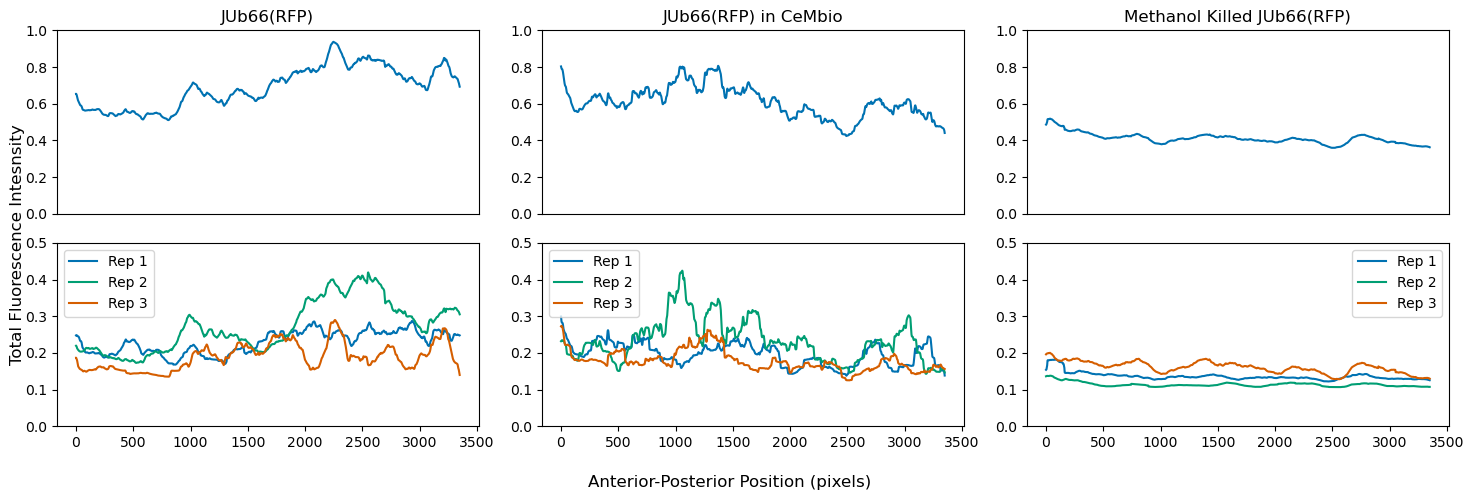

In [28]:
fig, axes = plt.subplots(2, 3, figsize=(15, 5))

for i, ax in enumerate(axes[0]):
    ax.plot(moving_avg_data[i], label="Intensity")
    ax.set_ylim(0,1)
    ax.set_xticks([])
    ax.set_title(titles[i])



for i, ax in enumerate(axes[1]):
    ax.plot(groups[i][0], label="JUb66(RFP)")
    ax.plot(groups[i][1], label="JUb66(RFP) in CeMbio")
    ax.plot(groups[i][2], label="Methanol Killed JUb66(RFP)")
    ax.set_ylim(0,0.5)
    ax.legend(["Rep 1", "Rep 2", "Rep 3"])

fig.supylabel("Total Fluorescence Intesnsity")
fig.supxlabel("Anterior-Posterior Position (pixels)")

plt.style.use('seaborn-v0_8-colorblind')

fig.tight_layout()